# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a junior in data analysis. I'm interested in the multi-player games and culture, contents industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.

This is my first Kaggle-data analysing project on my own. I played(?) with this data almost a month or more. Finally, I can close the analysis joyfully.

I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).


---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch colum). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


##### **Contents list**
---
1. data remaking (dummy etc)
2. data distribution (all round veiwing)
3. questions : result, processing, add commentary(그외 추가 이야기 및 부족한 것 필요한 것 개선 방향)
4. what I analized with this dataset(my files)

## Importin Data and Libraries
---

In [3]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.4.1
1.22.4
2.9.1
2.9.0


In [4]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [5]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [6]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 1. rankers by ladder

##### Q1. A total number of players in each division, usage of each class in descending order.

First I understood that question want to know about each class ratio in each ladder. And it is true maybe.  
(But... I think this question has to be more clear about 'players'. Because there're quite many users have multiple characters which are on ranked.)  
So I categorized meaning of 'players' as characters and users. 



## 1-1. id(character) and users in each ladder

In [8]:
# id, rank, account unique numbers

modes = ['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']

for i in modes:
    print("ladder:", i)
    print("number of unique id:", df[df['ladder'] == i]['id'].nunique())
    print("number of unique rank:", df[df['ladder'] == i]['rank'].nunique())
    print("number of unique account:", df[df['ladder'] == i]['account'].nunique())
    print("max value of the rank:", df[df['ladder'] == i]['rank'].max())
    print('---------------------------------')

ladder: Harbinger
number of unique id: 14918
number of unique rank: 14918
number of unique account: 13160
max value of the rank: 15000
---------------------------------
ladder: Hardcore Harbinger
number of unique id: 14905
number of unique rank: 14905
number of unique account: 9020
max value of the rank: 15000
---------------------------------
ladder: SSF Harbinger
number of unique id: 14981
number of unique rank: 14981
number of unique account: 10214
max value of the rank: 15000
---------------------------------
ladder: SSF Harbinger HC
number of unique id: 14972
number of unique rank: 14972
number of unique account: 6374
max value of the rank: 15000
---------------------------------


## 1-2. characters number of each class in each ladder

We can all class and ladder mode put together in one data frame for analyzing, and also make them seperately to see comfortable.  
First one, we can compare the number of specific class with other ladders easily.  
Second method, we can compare the number of specific ladder with other classes.

In [13]:
# pivot by class and ladder to one Data frame

df_cha_bylad = df.pivot_table(values = 'account', index = 'ladder', columns = 'class', aggfunc = 'count', margins=True, margins_name="total", fill_value = 0)

# transpose to make class as row
df_cha_bylad = df_cha_bylad.sort_values(ascending = False, by = 'ladder').transpose()
df_cha_bylad.reset_index(drop = False, inplace = True)

# drop 'index = 26 'total' row '
df_cha_bylad.drop(index = 26, inplace = True)
df_cha_bylad

ladder,class,total,SSF Harbinger HC,SSF Harbinger,Hardcore Harbinger,Harbinger
0,Ascendant,3754,865,1000,1149,740
1,Assassin,679,225,274,72,108
2,Berserker,8711,1644,2290,2064,2713
3,Champion,1216,338,262,490,126
4,Chieftain,2130,693,456,690,291
5,Deadeye,719,193,280,167,79
6,Duelist,65,55,10,0,0
7,Elementalist,1326,432,541,160,193
8,Gladiator,4900,1576,1320,1356,648
9,Guardian,1177,101,66,661,349


In [31]:
# if you want to see it seperated by ladder

# Harbinger
df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Pathfinder      3428
Berserker       2713
Raider          1943
Slayer          1706
Necromancer     1207
Ascendant        740
Gladiator        648
Inquisitor       559
Guardian         349
Chieftain        291
Trickster        211
Elementalist     193
Juggernaut       187
Saboteur         177
Occultist        151
Champion         126
Assassin         108
Hierophant       102
Deadeye           79
Name: id, dtype: int64

In [33]:
# Harbinger HC

df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Necromancer     2099
Berserker       2064
Gladiator       1356
Slayer          1343
Ascendant       1149
Raider           895
Trickster        834
Inquisitor       828
Chieftain        690
Juggernaut       672
Guardian         661
Champion         490
Pathfinder       416
Hierophant       398
Saboteur         304
Occultist        301
Deadeye          167
Elementalist     160
Assassin          72
Ranger             4
Marauder           1
Scion              1
Name: id, dtype: int64

In [34]:
# SSF Harbinger 

df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Berserker       2290
Necromancer     1716
Raider          1486
Gladiator       1320
Slayer          1301
Ascendant       1000
Trickster        955
Inquisitor       952
Hierophant       557
Elementalist     541
Chieftain        456
Juggernaut       437
Saboteur         407
Occultist        367
Deadeye          280
Assassin         274
Champion         262
Pathfinder       236
Guardian          66
Witch             21
Ranger            13
Shadow            10
Duelist           10
Marauder          10
Scion              8
Templar            6
Name: id, dtype: int64

In [35]:
# SSF Harbinger HC

df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Necromancer     2055
Berserker       1644
Gladiator       1576
Slayer          1135
Trickster       1058
Inquisitor      1052
Ascendant        865
Raider           826
Juggernaut       734
Chieftain        693
Hierophant       668
Elementalist     432
Occultist        413
Saboteur         393
Champion         338
Assassin         225
Deadeye          193
Pathfinder       159
Guardian         101
Witch             98
Marauder          84
Templar           65
Duelist           55
Scion             43
Shadow            36
Ranger            31
Name: id, dtype: int64

## 1-3. (plus) characters ratio of each class in each ladder (descending order)

In [39]:
# Harbinger
df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'Harbinger'].shape[0] * 100

class
Pathfinder     22.98
Berserker      18.19
Raider         13.02
Slayer         11.44
Necromancer     8.09
Ascendant       4.96
Gladiator       4.34
Inquisitor      3.75
Guardian        2.34
Chieftain       1.95
Trickster       1.41
Elementalist    1.29
Juggernaut      1.25
Saboteur        1.19
Occultist       1.01
Champion        0.84
Assassin        0.72
Hierophant      0.68
Deadeye         0.53
Name: id, dtype: float64

In [40]:
# HC Harbinger
df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False) / df[df['ladder'] == 'Hardcore Harbinger'].shape[0] * 100

class
Necromancer    14.08
Berserker      13.85
Gladiator       9.10
Slayer          9.01
Ascendant       7.71
Raider          6.00
Trickster       5.60
Inquisitor      5.56
Chieftain       4.63
Juggernaut      4.51
Guardian        4.43
Champion        3.29
Pathfinder      2.79
Hierophant      2.67
Saboteur        2.04
Occultist       2.02
Deadeye         1.12
Elementalist    1.07
Assassin        0.48
Ranger          0.03
Marauder        0.01
Scion           0.01
Name: id, dtype: float64

In [41]:
# SSF Harbinger
df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'SSF Harbinger'].shape[0] * 100

class
Berserker      15.29
Necromancer    11.45
Raider          9.92
Gladiator       8.81
Slayer          8.68
Ascendant       6.68
Trickster       6.37
Inquisitor      6.35
Hierophant      3.72
Elementalist    3.61
Chieftain       3.04
Juggernaut      2.92
Saboteur        2.72
Occultist       2.45
Deadeye         1.87
Assassin        1.83
Champion        1.75
Pathfinder      1.58
Guardian        0.44
Witch           0.14
Ranger          0.09
Shadow          0.07
Duelist         0.07
Marauder        0.07
Scion           0.05
Templar         0.04
Name: id, dtype: float64

In [42]:
# SSF Harbinger HC
df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False) / df[df['ladder'] == 'SSF Harbinger HC'].shape[0] * 100

class
Necromancer    13.73
Berserker      10.98
Gladiator      10.53
Slayer          7.58
Trickster       7.07
Inquisitor      7.03
Ascendant       5.78
Raider          5.52
Juggernaut      4.90
Chieftain       4.63
Hierophant      4.46
Elementalist    2.89
Occultist       2.76
Saboteur        2.62
Champion        2.26
Assassin        1.50
Deadeye         1.29
Pathfinder      1.06
Guardian        0.67
Witch           0.65
Marauder        0.56
Templar         0.43
Duelist         0.37
Scion           0.29
Shadow          0.24
Ranger          0.21
Name: id, dtype: float64

## 1-4. Visualization

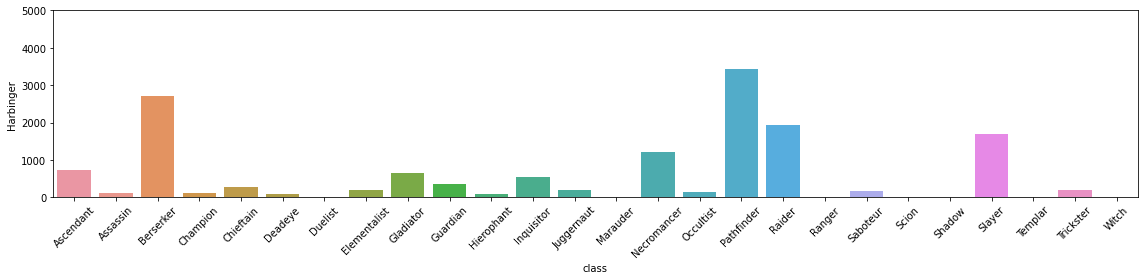

In [50]:
# if you want to see as seperated by ladder

plt.subplots(figsize = (16, 4))

plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 5000)
plt.xticks(rotation=45, fontsize=10)

sns.barplot(x = 'class', y = 'Harbinger', data = df_cha_bylad)
plt.tight_layout()
plt.show()

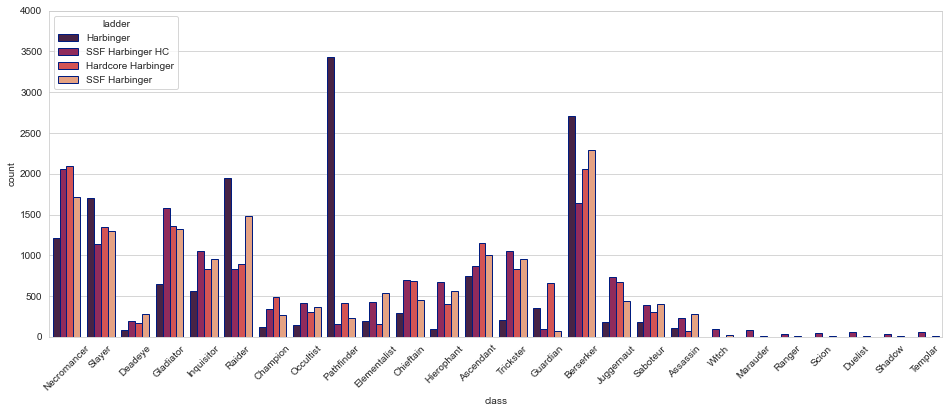

In [55]:
# if you want to see all of them

plt.rcParams["figure.figsize"] = (16, 6)
plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 4000)
plt.xticks(rotation=45, fontsize=10)
sns.set_style('whitegrid')
ax = sns.countplot(data = df, x = 'class',
              palette="rocket", edgecolor=sns.color_palette("dark", 1), hue = 'ladder') 

## 1-5.

# 3. Case when we were Necromancer
---

In [ ]:
nec30 = df[(df['class'] == 'Necromancer')&(df['rank']<=30)][['rank', 'class', 'id', 'level', 'account', 'challenges', 'ladder', 'twitch']]
nec30

In [ ]:
nec30.describe()

Necromancers who's in top 30

In [ ]:
# 30위 안에 드는 네크로멘서들이 ladder division 별로 몇 명이나 있냐. 

nec30.groupby(by = 'ladder').nunique()

근데 이들, 생각보다 랭크가 높다. 무려 세개의 부문에서 1등을 하고 있음.

30등 안에 들은 비율들을 클래스별로 내본다.

그다음 총 클래스가 26개인 것을 고려해서 최소 ladder 별로 1퍼센트 이상이 되면 꽤 많은 것 이런식으로 가도 될 것 같고.

30등 안에 들을 확률이 높은 일부 랭크 안에서도 구해서 가중? 치를 두어도 될 것 같다는 생각이 들음.